<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/zomato_with_regg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
import time
import warnings
warnings.filterwarnings('ignore')

### Reading the file

In [0]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### shape and columns list

In [0]:
# Dimensions
df.shape

(51717, 17)

In [0]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Null items finding out

In [0]:
# Null data
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### missing data percentage in the file

In [0]:
a=(((df.isnull().sum().sum())/(df.index.size*df.shape[1]))*100).round(2)
a

4.29

### Droping unwanted data and categorical columns

In [0]:
del df['url']
del df['phone']
del df['address']
del df['location']

# EDA
*   In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
In this Exploratory Data Analysis we will see:

* Changing data types and make some transformation;
* Dealing with null data;
* Top Restaurants by rating;
* The approx cost (for two people) and rate of restaurants;
* Correlation between cost and rate;
* The influence of online_order and book_table attributes;
* Cost and rate by type of restaurants;
* Cost and rate of restaurants by localization (city)

In [0]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

#### Let's do some transformation here:

#### approx_cost(for two people):
  * Change the data type from object to float;

#### rate:
  * Let's eliminate the "/5" text and change data type from object to float

In [0]:
# Approx cost
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',', '.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
print(f'{type(df["approx_cost(for two people)"][0])}')

<class 'numpy.float64'>


### Transformation of data  for Ratings

In [0]:
df['ratings'] = df['rate'].astype(str)
df['ratings'] =df['ratings'].apply(lambda x: x.split('/')[0])
df['ratings'] = df['ratings'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['ratings'] =df['ratings'].apply(lambda x: x.replace('-', str(np.nan)))

#converting  to float
df['ratings'] =df['ratings'].astype(float)
df.drop(['rate'], axis=1, inplace=True)

In [0]:
df.ratings.value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: ratings, dtype: int64

In [0]:
df.dtypes

name                            object
online_order                    object
book_table                      object
votes                            int64
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
ratings                        float64
dtype: object

### Null Data¶
As we saw above, our data has null data in some attributes. In our first approach, let's do a quick analysis and drop some columns that probably don't make difference on conclusions.

In [0]:
# Droping NA from rate_transformed
df.dropna(subset=['ratings', 'approx_cost(for two people)'], inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 51716
Data columns (total 13 columns):
name                           41418 non-null object
online_order                   41418 non-null object
book_table                     41418 non-null object
votes                          41418 non-null int64
rest_type                      41271 non-null object
dish_liked                     23327 non-null object
cuisines                       41410 non-null object
approx_cost(for two people)    41418 non-null float64
reviews_list                   41418 non-null object
menu_item                      41418 non-null object
listed_in(type)                41418 non-null object
listed_in(city)                41418 non-null object
ratings                        41418 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 4.4+ MB


In [0]:
df['approx_cost(for two people)'].describe()

count    41418.000000
mean       369.672383
std        242.302140
min          1.000000
25%        200.000000
50%        400.000000
75%        500.000000
max        950.000000
Name: approx_cost(for two people), dtype: float64

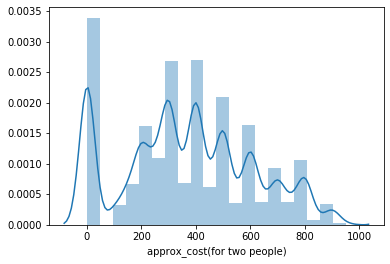

In [0]:
#sns.boxplot(df['approx_cost(for two people)'])
sns.distplot(df['approx_cost(for two people)'],bins=20)


### Top Restaurants by Rating

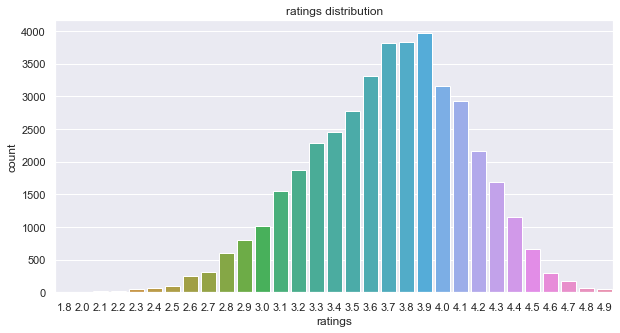

In [0]:
plt.figure(1, figsize=(10, 5))
sns.set(style="darkgrid")
sns.countplot( x= 'ratings', data=df)
plt.title('ratings distribution')
plt.show()

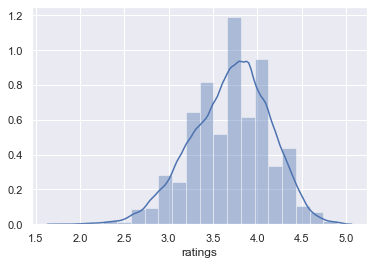

In [0]:
sns.distplot(df["ratings"],bins=20)


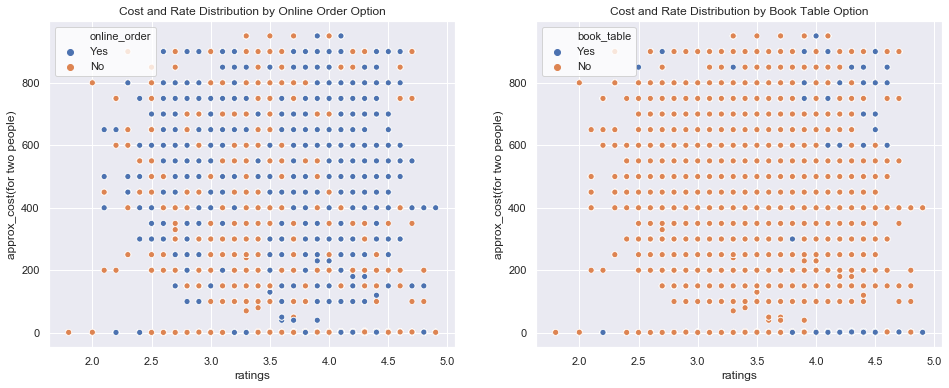

In [0]:
# Separating by Online Order and Book Table options
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.set(style="white")
sns.scatterplot(x='ratings', y='approx_cost(for two people)', hue='online_order', data=df, ax=axs[0])
sns.scatterplot(x='ratings', y='approx_cost(for two people)', hue='book_table',data=df, ax=axs[1])
axs[0].set_title('Cost and Rate Distribution by Online Order Option')
axs[1].set_title('Cost and Rate Distribution by Book Table Option')
plt.show()

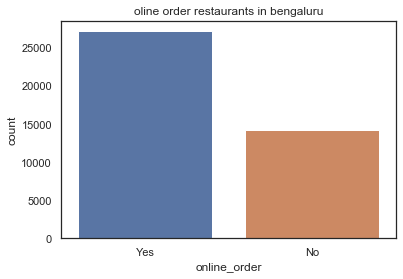

In [0]:
sns.countplot(x='online_order', data=df)
plt.title("oline order restaurants in bengaluru")
plt.show()

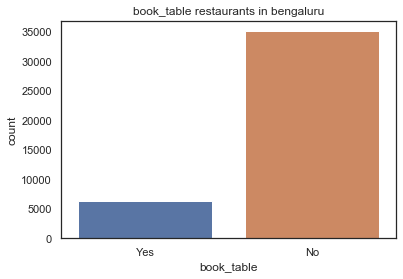

In [0]:
sns.countplot(x='book_table', data=df)
plt.title("book_table restaurants in bengaluru")
plt.show()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 51716
Data columns (total 13 columns):
name                           41418 non-null object
online_order                   41418 non-null object
book_table                     41418 non-null object
votes                          41418 non-null int64
rest_type                      41271 non-null object
dish_liked                     23327 non-null object
cuisines                       41410 non-null object
approx_cost(for two people)    41418 non-null float64
reviews_list                   41418 non-null object
menu_item                      41418 non-null object
listed_in(type)                41418 non-null object
listed_in(city)                41418 non-null object
ratings                        41418 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 5.7+ MB


In [0]:
df.online_order=df.online_order.apply(lambda x: '1' if str(x)=='Yes' else '0')
df.book_table=df.book_table.apply(lambda x: '1' if str(x)=='Yes' else '0')
df.online_order=df.online_order.astype(int)
df.book_table=df.book_table.astype(int)

In [0]:
df.online_order.value_counts()

1    27206
0    14212
Name: online_order, dtype: int64

In [0]:
df.book_table.value_counts()

0    35114
1     6304
Name: book_table, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 51716
Data columns (total 13 columns):
name                           41418 non-null object
online_order                   41418 non-null int32
book_table                     41418 non-null int32
votes                          41418 non-null int64
rest_type                      41271 non-null object
dish_liked                     23327 non-null object
cuisines                       41410 non-null object
approx_cost(for two people)    41418 non-null float64
reviews_list                   41418 non-null object
menu_item                      41418 non-null object
listed_in(type)                41418 non-null object
listed_in(city)                41418 non-null object
ratings                        41418 non-null float64
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 5.4+ MB


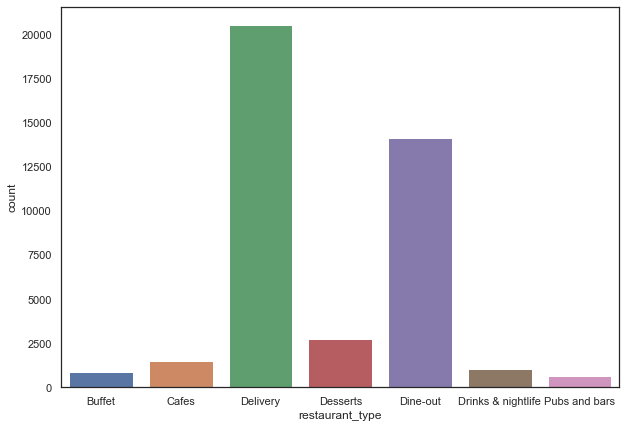

In [0]:
df.rename(columns={"listed_in(city)":"located","listed_in(type)":"restaurant_type"},inplace=True)
plt.figure(figsize=(10,7))
sns.countplot(x="restaurant_type",data=df)

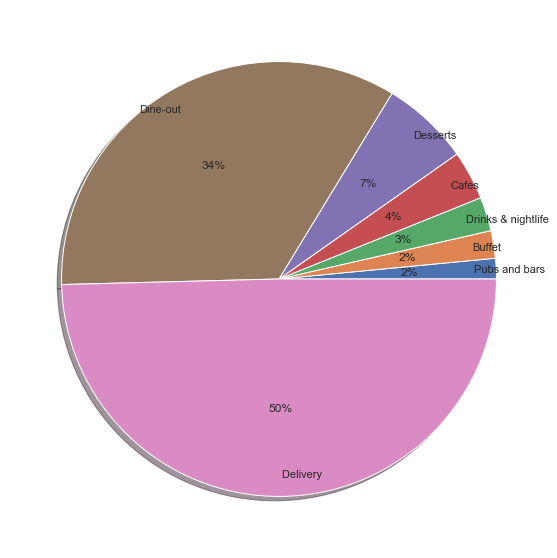

In [0]:
cnt=df['restaurant_type'].value_counts().sort_values(ascending=True)
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
fig=plt.gcf()
plt.pie(cnt,labels=labels ,autopct='%1.0f%%', pctdistance=0.6,labeldistance=0.9,shadow=True)
fig.set_size_inches(10,10)
plt.show()

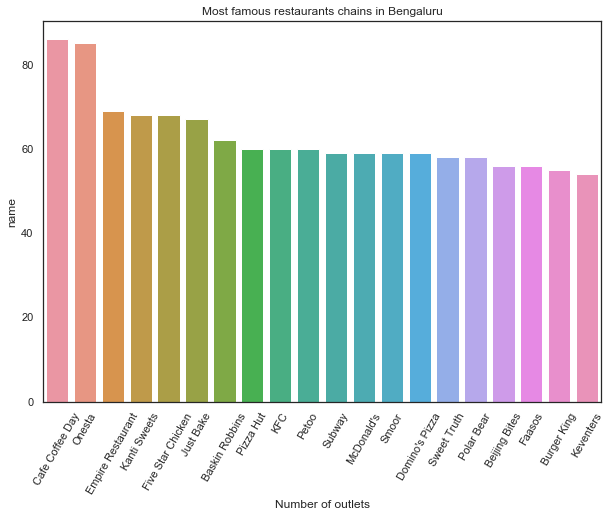

In [0]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(y=chains,x=chains.index)
plt.title("Most famous restaurants chains in Bengaluru")
plt.xlabel("Number of outlets")
plt.xticks(rotation=60)
plt.show()

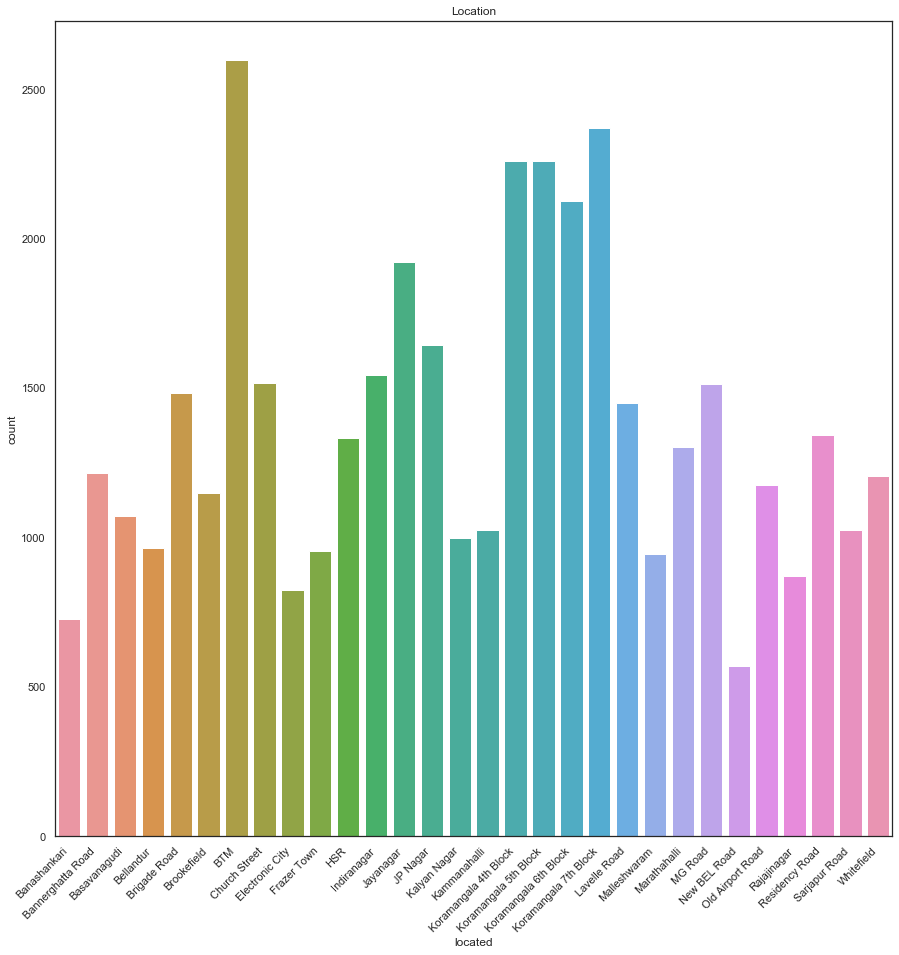

In [0]:
sns.countplot(df['located'])
sns.countplot(df['located']).set_xticklabels(sns.countplot(df['located']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Location')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Cost of Restuarant')

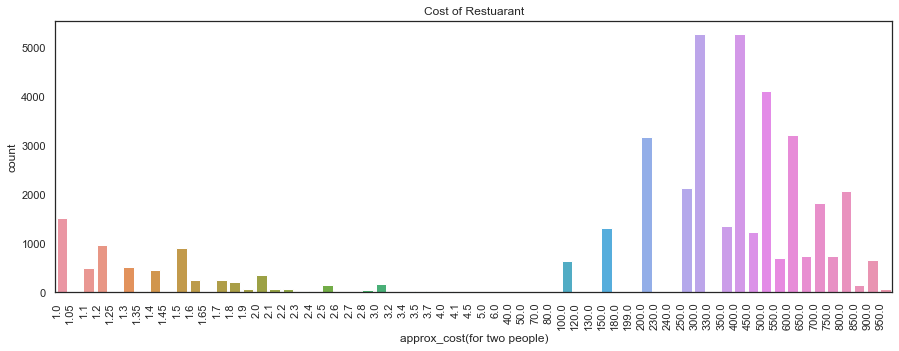

In [0]:
sns.countplot(df['approx_cost(for two people)'])
sns.countplot(df['approx_cost(for two people)']).set_xticklabels(sns.countplot(df['approx_cost(for two people)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Cost of Restuarant')

In [0]:
df.drop(["reviews_list","menu_item"],axis=1,inplace=True)
df.head(1)

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),restaurant_type,located,ratings
0,Jalsa,1,1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,4.1


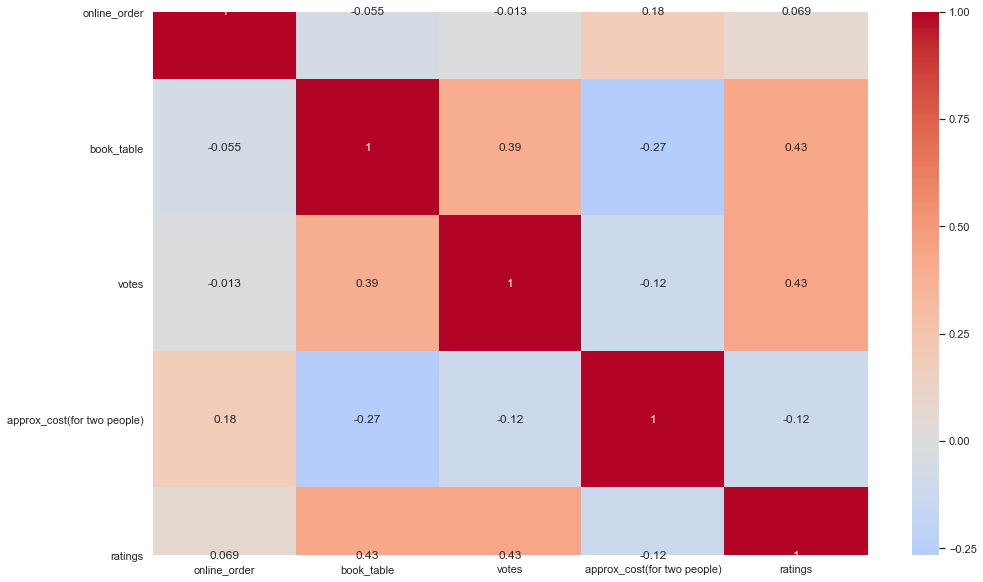

In [0]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',center=0)
plt.show()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 51716
Data columns (total 11 columns):
name                           41418 non-null object
online_order                   41418 non-null int32
book_table                     41418 non-null int32
votes                          41418 non-null int64
rest_type                      41271 non-null object
dish_liked                     23327 non-null object
cuisines                       41410 non-null object
approx_cost(for two people)    41418 non-null float64
restaurant_type                41418 non-null object
located                        41418 non-null object
ratings                        41418 non-null float64
dtypes: float64(2), int32(2), int64(1), object(6)
memory usage: 4.7+ MB


In [0]:
df.restaurant_type.value_counts()

Delivery              20540
Dine-out              14128
Desserts               2714
Cafes                  1511
Drinks & nightlife     1045
Buffet                  848
Pubs and bars           632
Name: restaurant_type, dtype: int64

### converting object dtype to numeric type

In [0]:
cat_cols=df.select_dtypes(["object"]).columns
cat_cols

Index(['name', 'rest_type', 'dish_liked', 'cuisines', 'restaurant_type',
       'located'],
      dtype='object')

In [0]:
for col in cat_cols:
    freqs=df[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+"_"+cat
        df[name]=(df[col]==cat).astype(int)
    del df[col]
    print(col)

name
rest_type
dish_liked
cuisines
restaurant_type
located


In [0]:
df.shape

(41418, 640)

In [0]:
df.head()

,online_order,book_table,votes,approx_cost(for two people),ratings,name_Cafe Coffee Day,name_Onesta,name_Empire Restaurant,name_Kanti Sweets,name_Five Star Chicken,...,located_Basavanagudi,located_Sarjapur Road,located_Kammanahalli,located_Kalyan Nagar,located_Bellandur,located_Frazer Town,located_Malleshwaram,located_Rajajinagar,located_Electronic City,located_Banashankari
0,1,1,775,800.0,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,787,800.0,4.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,918,800.0,3.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,88,300.0,3.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,166,600.0,3.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [0]:
df.isnull().sum()

online_order                   0
book_table                     0
votes                          0
approx_cost(for two people)    0
ratings                        0
                              ..
located_Frazer Town            0
located_Malleshwaram           0
located_Rajajinagar            0
located_Electronic City        0
located_Banashankari           0
Length: 640, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41418 entries, 0 to 51716
Columns: 640 entries, online_order to located_Banashankari
dtypes: float64(2), int32(637), int64(1)
memory usage: 103.2 MB


### TEST TRAIN SPLIT

In [0]:
X=df.drop("approx_cost(for two people)",axis=1)
y=df["approx_cost(for two people)"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Linear Regression 

In [0]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


In [0]:
reg.intercept_

343.82891566863276

In [0]:
list(zip(X_train.columns,reg.coef_))

[('online_order', 28.788278754959464),
 ('book_table', -120.28345124607138),
 ('votes', -0.01753717228558571),
 ('ratings', -21.70106299421451),
 ('name_Cafe Coffee Day', 312.54615153772596),
 ('name_Onesta', 142.85499916807834),
 ('name_Empire Restaurant', 55.97455161729644),
 ('name_Kanti Sweets', 169.58551075675723),
 ('name_Five Star Chicken', -62.002945335807226),
 ('name_Just Bake', 34.899316071111485),
 ('name_Baskin Robbins', -93.77976969291203),
 ('name_Pizza Hut', 291.50189417042793),
 ('name_KFC', 65.52690571978765),
 ('name_Petoo', 192.31168402274363),
 ('name_Subway', 243.7558903550095),
 ("name_McDonald's", 148.59624443983463),
 ('name_Smoor', 439.06475068894406),
 ("name_Domino's Pizza", 150.7596302592771),
 ('name_Sweet Truth', 47.97085688536295),
 ('name_Polar Bear', -38.88565721622608),
 ('name_Beijing Bites', 250.29962346745228),
 ('name_Faasos', 179.9923606191708),
 ('name_Burger King', 55.62824607592545),
 ('name_Keventers', 27.265806428090023),
 ("name_Smally's Re

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print("RMSE",np.sqrt(mse))
print("mse",mse)
print("r_squared",r_squared)

RMSE 165.68574352812692
mse 27451.765608468253
r_squared 0.5304783134298807


In [0]:
n=41418 
p=640 
adj=(1-((1-r_squared)*(n-1))/(n-p-1))
adj

0.5231091131600012

### Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.7770813758590278

### Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=50,random_state=0,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_pred)
print("RMSE",np.sqrt(mse))
print("mse",mse)
print("r_squared",r2_score)

RMSE 165.68574352812692
mse 27451.765608468253
r_squared 0.8009453942861413


### KNN Regression

In [0]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    

RMSE value for k=  1 is: 146.9146566271887
RMSE value for k=  2 is: 144.44639025264547
RMSE value for k=  3 is: 149.33573240290363
RMSE value for k=  4 is: 154.98482917154547
RMSE value for k=  5 is: 160.1307265085724
RMSE value for k=  6 is: 165.36623541077822
RMSE value for k=  7 is: 169.79576309864493
RMSE value for k=  8 is: 173.09705629513576
RMSE value for k=  9 is: 176.50374007546372
RMSE value for k=  10 is: 179.2838041041724
RMSE value for k=  11 is: 181.60861610238734
RMSE value for k=  12 is: 183.91495950715236
RMSE value for k=  13 is: 185.93236849750275
RMSE value for k=  14 is: 187.740687674509
RMSE value for k=  15 is: 189.50618325614792
RMSE value for k=  16 is: 191.1177785409997
RMSE value for k=  17 is: 192.64266545089114
RMSE value for k=  18 is: 194.07368509881297
RMSE value for k=  19 is: 195.5297749823493
RMSE value for k=  20 is: 196.79427681296303


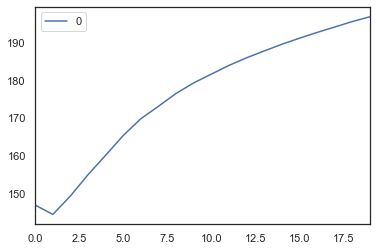

In [0]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [0]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,5,100)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 1}